<a href="https://colab.research.google.com/github/RudyHarun99/H8_056/blob/master/PYTN_Final_056_Rudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import numpy as np
import pandas as pd

In [70]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [71]:
path = '/content/gdrive/MyDrive/DATA/Hacktiv8_ptp_python/bank.csv'
bank = pd.read_csv(path, sep=';')
bank.shape

(4521, 17)

In [72]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [73]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [74]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [75]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [76]:
bank.age.describe()

count    4521.000000
mean       41.170095
std        10.576211
min        19.000000
25%        33.000000
50%        39.000000
75%        49.000000
max        87.000000
Name: age, dtype: float64

In [77]:
print('Usia tertua :', bank.age.max())
print('Usia termuda :', bank.age.min())

Usia tertua : 87
Usia termuda : 19


In [78]:
bank.age.value_counts().head(10)

34    231
32    224
31    199
36    188
33    186
35    180
37    161
38    159
30    150
40    142
Name: age, dtype: int64

In [79]:
bank.job.describe()

count           4521
unique            12
top       management
freq             969
Name: job, dtype: object

In [80]:
bank.job.value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [81]:
bank.marital.describe()

count        4521
unique          3
top       married
freq         2797
Name: marital, dtype: object

In [82]:
bank.marital.value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

In [83]:
bank.education.describe()

count          4521
unique            4
top       secondary
freq           2306
Name: education, dtype: object

In [84]:
bank.education.value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

In [85]:
bank.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000


In [86]:
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

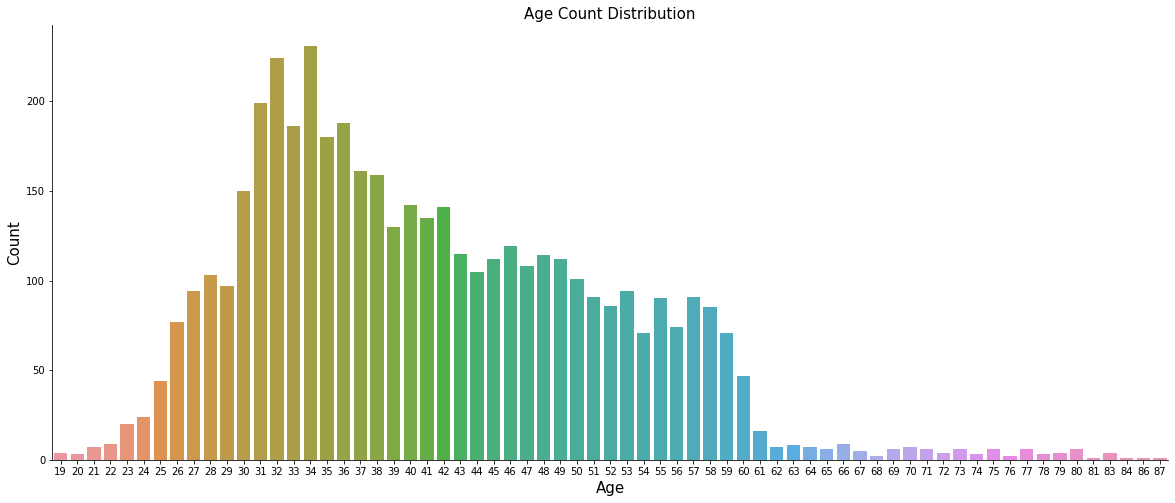

In [87]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sb.countplot(x = 'age', data = bank)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sb.despine()

In [88]:
jobFig = go.Figure(data=go.Pie(labels = bank.job.unique(), values = bank.job.value_counts()), layout_title_text='Job Percentage')

jobFig.show()

In [89]:
marFig = go.Figure(data=go.Pie(labels = bank.marital.unique(), values = bank.marital.value_counts()), layout_title_text='Marital Percentage')

marFig.show()

In [90]:
eduFig = go.Figure(data=go.Pie(labels = bank.education.unique(), values = bank.education.value_counts()), layout_title_text='Education Percentage')

eduFig.show()

In [91]:
labels = ['Yes', 'No']

fig = make_subplots(rows = 1, cols = 3, specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels = labels, values = bank.default.value_counts(), name = 'Default'), 1, 1)
fig.add_trace(go.Pie(labels = labels, values = bank.housing.value_counts(), name = 'Housing'), 1, 2)
fig.add_trace(go.Pie(labels = labels, values = bank.loan.value_counts(), name = 'Loan'), 1, 3)

fig.update_traces(hole = .4, hoverinfo = 'label+percent+name')

fig.update_layout(
    title_text = 'Default, Housing, Loan Percentage',
    annotations = [dict(text = 'Default', x = 0.10, y = 0.5, font_size = 20, showarrow = False),
                   dict(text = 'Housing', x = 0.50, y = 0.5, font_size = 20, showarrow = False),
                   dict(text = 'Loan', x = 0.88, y = 0.5, font_size = 20, showarrow = False)])
fig.show()

In [92]:
bank['target'] = bank['y'].replace({'no' : 0, 'yes' : 1})
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,target
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,0


In [93]:
y = pd.DataFrame(bank.target)
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [94]:
X = pd.get_dummies(bank.drop(['y'], axis = 1))
X.head()

,age,balance,day,duration,campaign,pdays,previous,target,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [95]:
X.shape

(4521, 52)

In [96]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression as lr
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.ensemble import RandomForestClassifier as rf

In [97]:
import warnings
warnings.filterwarnings('ignore')

In [98]:
Xtr, Xts, ytr, yts = tts(X, y, test_size = .2)

In [99]:
LR = lr()
DT = dt()
RF = rf()

In [100]:
LR.fit(Xtr, ytr)
DT.fit(Xtr, ytr)
RF.fit(Xtr, ytr)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [101]:
listScore = [LR.score(Xts, yts), DT.score(Xts, yts), RF.score(Xts, yts)]
dfScore = pd.DataFrame(listScore, columns = ['score'], index = ['Logistic Regresision', 'Decision Tree', 'Random Forest'])
dfScore

,score
Logistic Regresision,0.973481
Decision Tree,1.000000
Random Forest,1.000000


In [102]:
listScoreTrain = [LR.score(Xtr, ytr), DT.score(Xtr, ytr), RF.score(Xtr, ytr)]
dfScoreTrain = pd.DataFrame(listScore, columns = ['score'], index = ['Logistic Regresision', 'Decision Tree', 'Random Forest'])
dfScoreTrain

,score
Logistic Regresision,0.973481
Decision Tree,1.000000
Random Forest,1.000000


In [103]:
predLR = LR.predict(Xts)
predDT = DT.predict(Xts)
predRF = RF.predict(Xts)

In [104]:
from sklearn import  metrics

In [105]:
print(metrics.roc_auc_score(yts, predLR))
print(metrics.roc_auc_score(yts, predDT))
print(metrics.roc_auc_score(yts, predRF))

0.9106521739130435
1.0
1.0


In [106]:
print('Confusion Metrix model LR :\n', metrics.confusion_matrix(predLR, yts))
print('Confusion Metrix model DT :\n', metrics.confusion_matrix(predDT, yts))
print('Confusion Metrix model RF :\n', metrics.confusion_matrix(predRF, yts))

Confusion Metrix model LR :
 [[798  17]
 [  7  83]]
Confusion Metrix model DT :
 [[805   0]
 [  0 100]]
Confusion Metrix model RF :
 [[805   0]
 [  0 100]]


In [107]:
print(metrics.classification_report(yts, predLR))
print(metrics.classification_report(yts, predDT))
print(metrics.classification_report(yts, predRF))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       805
           1       0.92      0.83      0.87       100

    accuracy                           0.97       905
   macro avg       0.95      0.91      0.93       905
weighted avg       0.97      0.97      0.97       905

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       805
           1       1.00      1.00      1.00       100

    accuracy                           1.00       905
   macro avg       1.00      1.00      1.00       905
weighted avg       1.00      1.00      1.00       905

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       805
           1       1.00      1.00      1.00       100

    accuracy                           1.00       905
   macro avg       1.00      1.00      1.00       905
weighted avg       1.00      1.00      1.00       905



In [108]:
dfTarget = pd.DataFrame(yts)
dfTarget['y_pred_LR'] = predLR
dfTarget['y_pred_DT'] = predDT
dfTarget['y_pred_RF'] = predRF

dfTarget.head()

,target,y_pred_LR,y_pred_DT,y_pred_RF
3082,0,0,0,0
2919,0,0,0,0
548,0,0,0,0
3450,0,0,0,0
3042,0,0,0,0
